## Usage (The only thing you need to read)

In [2]:
from dataset import Dataset

d = Dataset('data.csv', train_batch_num=10, batch_size=10, window=10)
for X, y in d.train_batch():
    pass
    # X: is a 4d array (batch_size, OHLC, assets, window)
    #    All price is divided by the closing price in the first day and subtracted by 1
    # y: is a binary 2d array (batch_size, assets)

want to know more details? read on

## Download

In [15]:
import fix_yahoo_finance as yf
data = {}
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'INTC', 'CSCO', 'CMCSA', 'PEP', 'NFLX', 'ADBE']
data = yf.download(tickers, start="2006-02-01", end="2019-02-01")

[*********************100%***********************]  10 of 10 downloaded


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2006-02-01 to 2019-01-31
Data columns (total 60 columns):
(Open, AAPL)          3272 non-null float64
(Open, ADBE)          3272 non-null float64
(Open, AMZN)          3272 non-null float64
(Open, CMCSA)         3272 non-null float64
(Open, CSCO)          3272 non-null float64
(Open, GOOGL)         3272 non-null float64
(Open, INTC)          3272 non-null float64
(Open, MSFT)          3272 non-null float64
(Open, NFLX)          3272 non-null float64
(Open, PEP)           3272 non-null float64
(High, AAPL)          3272 non-null float64
(High, ADBE)          3272 non-null float64
(High, AMZN)          3272 non-null float64
(High, CMCSA)         3272 non-null float64
(High, CSCO)          3272 non-null float64
(High, GOOGL)         3272 non-null float64
(High, INTC)          3272 non-null float64
(High, MSFT)          3272 non-null float64
(High, NFLX)          3272 non-null float64
(High, PEP)           3272 non-null flo

In [18]:
# export
data.to_csv('data.csv')

## Load

In [40]:
import pandas as pd
data_bak = pd.read_csv('data.csv', header=[0, 1], index_col=0, parse_dates=True)

## Index

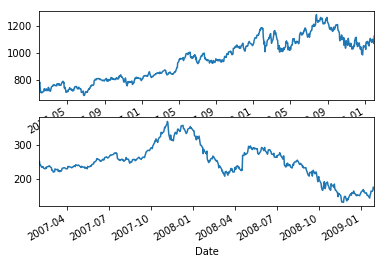

In [330]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=2, ncols=1)

data_bak['Close']['GOOGL'].loc['2016-01-31':].plot(ax=axes[0])

start = datetime(2007, 1, 31)
end = start + relativedelta(years=2)
data_bak['Close']['GOOGL'].loc[start:end].plot(ax=axes[1])

## Baseline

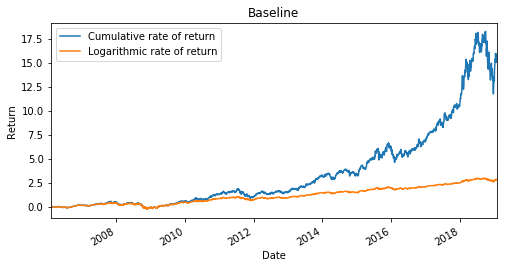

In [47]:
import numpy as np
fig, ax = plt.subplots(figsize=(8, 4))
avg = (data_bak['Close']/data_bak['Close'].iloc[0]).sum(axis=1)/len(data_bak['Close'].columns)
(avg-1).plot(ax=ax, label='Cumulative rate of return')
np.log(avg).plot(label='Logarithmic rate of return')
ax.set_xlabel('Date')
ax.set_ylabel('Return')
ax.set_title('Baseline')
ax.legend()
# fig.savefig('1.pdf')

## Add more features (technical indicators)

In [228]:
# concat two multiindex dataframes
columns=pd.MultiIndex.from_product([['foo', 'bar', 'baz', 'qux'], ['one','two']])
df = pd.DataFrame(np.random.randn(3, 8), index=['A', 'B', 'C'], columns=columns)
df2 = pd.DataFrame(np.random.randn(3, 2), index=['A', 'B', 'C'], columns=pd.MultiIndex.from_product([['new'], ['one','two']]))
pd.concat([df, df2], axis=1)

foo                 bar                 baz                 qux  \
        one       two       one       two       one       two       one   
A  0.071402  1.359754  1.145416 -0.055506 -0.323097 -1.298489  0.598420   
B  0.483162  0.864606  0.239135 -0.542073  0.877504  0.478929  0.182242   
C  0.266894 -0.007629 -0.195776 -0.193476 -0.931794 -0.506026 -0.195782   

                  new            
        two       one       two  
A  0.906434  0.367272 -1.618910  
B  1.282811  0.332464 -0.749786  
C  1.880512  0.069063  1.054797

In [229]:
# convert a dataframe to a multiindex dataframe
df2 = pd.DataFrame(np.random.randn(3, 2), index=['A', 'B', 'C'], columns=['one','two'])
df2.columns = pd.MultiIndex.from_product([['new'], df2.columns])
pd.concat([df, df2], axis=1)

foo                 bar                 baz                 qux  \
        one       two       one       two       one       two       one   
A  0.071402  1.359754  1.145416 -0.055506 -0.323097 -1.298489  0.598420   
B  0.483162  0.864606  0.239135 -0.542073  0.877504  0.478929  0.182242   
C  0.266894 -0.007629 -0.195776 -0.193476 -0.931794 -0.506026 -0.195782   

                  new            
        two       one       two  
A  0.906434 -0.183600 -0.788130  
B  1.282811  0.225304 -0.125984  
C  1.880512 -0.209039  0.094274

In [225]:
# create a multiindex dataframe from multiple dataframes
df = pd.concat([pd.DataFrame(np.random.randn(3,2)),pd.DataFrame(np.random.randn(3,2))],
    axis=1,
    keys=['foo', 'bar'])
df

foo                 bar          
          0         1         0         1
0 -1.069423 -0.442996  0.988496  1.343497
1 -1.454684  1.266748  0.207671 -1.092974
2  0.708267 -0.665270  1.167576  1.810330

In [352]:
# advanced index and assign
idx = pd.IndexSlice
index=['A','B','C']
df = pd.DataFrame(index=index, columns=pd.MultiIndex.from_product([['foo','bar','baz'], ['one','two']]))
df.loc(axis=1)[idx[['foo', 'bar'],'one']] = pd.DataFrame(np.zeros((3,2)), index=index).values
df

foo       bar       baz     
   one  two  one  two  one  two
A  0.0  NaN  0.0  NaN  NaN  NaN
B  0.0  NaN  0.0  NaN  NaN  NaN
C  0.0  NaN  0.0  NaN  NaN  NaN

In [321]:
help(talib.ROC)

Help on built-in function ROC in module talib._ta_lib:

ROC(...)
    ROC(real[, timeperiod=?])
    
    Rate of change : ((real/prevPrice)-1)*100 (Momentum Indicators)
    
    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 10
    Outputs:
        real



In [338]:
from talib.abstract import *

index = data_bak.index
stocks = data_bak.columns.levels[1]
features = ['MA5', 'MA10', 'MACD', 'MACDS', 'MACDH', 'ROC5', 'ROC10', 'EMA20', 'ATR', 'BBANDU', 'BBANDM', 'BBANDL',
            'CCI', 'RSI', 'STOCHK', 'STOCHD', 'OBV']
# create an empty dataframe with columns and indexes
df = pd.DataFrame(
    index=index,
    columns=pd.MultiIndex.from_product([features, stocks]))
# apply to each stock
for stock in stocks:
    inputs = data_bak.xs(stock, level=1, axis=1)
    inputs = inputs.rename(columns={'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'})
    inputs['volume'] = inputs['volume'].astype(float)
    df.loc(axis=1)[idx[['MA5'], stock]] = MA(inputs, timeperiod=5) # >0, /c
    df.loc(axis=1)[idx[['MA10'], stock]] = MA(inputs, timeperiod=10)
    # can not use dataframe directly, convert to ndarray instead
    df.loc(axis=1)[idx[['MACD', 'MACDS', 'MACDH'], stock]] = MACD(inputs).values # 0, /c
    df.loc(axis=1)[idx[['ROC5'], stock]] = ROC(inputs, timeperiod=5) # 0, >-100, /100
    df.loc(axis=1)[idx[['ROC10'], stock]] = ROC(inputs, timeperiod=10)
    df.loc(axis=1)[idx[['EMA20'], stock]] = EMA(inputs, timeperiod=20) # /c
    df.loc(axis=1)[idx[['ATR'], stock]] = ATR(inputs) # >0, /c
    df.loc(axis=1)[idx[['BBANDU', 'BBANDM', 'BBANDL'], stock]] = BBANDS(inputs).values # >0, /c
    df.loc(axis=1)[idx[['CCI'], stock]] = CCI(inputs) # 0, std overall
    df.loc(axis=1)[idx[['RSI'], stock]] = RSI(inputs) # 0-100, /100
    df.loc(axis=1)[idx[['STOCHK', 'STOCHD'], stock]] = STOCH(inputs).values # 0-100, /100
    df.loc(axis=1)[idx[['OBV'], stock]] = OBV(inputs) # 0, /first

data2 = pd.concat([data_bak, df], axis=1)
df.xs('AAPL', level=1, axis=1)[-50:]


,MA5,MA10,MACD,MACDS,MACDH,ROC5,ROC10,EMA20,ATR,BBANDU,BBANDM,BBANDL,CCI,RSI,STOCHK,STOCHD,OBV
Date,,,,,,,,,,,,,,,,,
2018-11-16,191.628000,198.641000,-7.279643,-5.339565,-1.940078,-5.350419,-6.723538,204.717859,6.804252,196.827910,191.628000,186.428090,-87.013633,37.706829,28.495050,14.516873,8.064009e+09
2018-11-19,189.966001,197.068001,-7.857128,-5.843077,-2.014050,-4.279753,-7.802964,202.921873,6.928233,196.084542,189.966001,183.847460,-109.951685,33.211606,29.675185,23.286220,8.022083e+09
2018-11-20,186.916001,194.389000,-8.928410,-6.460144,-2.468266,-7.933205,-13.147179,200.451218,7.172646,198.363055,186.916001,175.468946,-150.471153,28.913867,23.096208,27.088814,7.954258e+09
2018-11-21,184.912000,191.072000,-9.681939,-7.104503,-2.577436,-5.364028,-15.798999,198.196816,6.926028,198.953048,184.912000,170.870952,-136.056450,28.823399,7.072386,19.947926,7.923134e+09
2018-11-23,181.087998,187.451999,-10.520153,-7.787633,-2.732520,-9.989034,-17.362948,195.729499,6.765597,196.330434,181.087998,165.845561,-143.440084,26.796334,4.970304,11.712966,7.899510e+09
2018-11-26,177.305997,184.466998,-10.871116,-8.404330,-2.466787,-9.771097,-14.598722,193.719070,6.617340,186.511597,177.305997,168.100397,-121.283407,29.564599,9.562558,7.201749,7.944508e+09
2018-11-27,174.981998,182.473999,-11.052513,-8.933966,-2.118546,-6.252015,-10.264198,191.863921,6.422530,178.463755,174.981998,171.500240,-103.709108,29.369537,19.221844,11.251569,7.903121e+09
2018-11-28,175.773999,181.345000,-10.534205,-9.254014,-1.280191,2.237544,-5.873170,190.823548,6.467349,181.674696,175.773999,169.873302,-55.236934,37.233081,51.220574,26.668326,7.949184e+09
2018-11-29,176.328000,180.620000,-10.118959,-9.427003,-0.691956,1.566922,-3.881156,189.749877,6.369681,182.975367,176.328000,169.680632,-38.380736,36.329412,68.804651,46.415690,7.907414e+09


In [492]:
data2.to_csv('data2.csv')